<a href="https://colab.research.google.com/github/iqrakhan310/ML-PROJECTS/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OVERVIEW:The Titanic survival prediction project is a classic machine learning project that aims to predict whether passengers aboard the RMS Titanic survived or not based on various features such as age, gender, ticket class, and more.

IMPORTING ESSENTIAL MODULES

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

LOADING DATASET




In [ ]:
titanic_data=pd.read_csv('train.csv')
titanic_data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


STATISTICAL INFO

In [ ]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


VISUALIZING CORRELATION MATRIX

<ipython-input-35-1387a900204e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_data.corr(),cmap="YlGnBu")


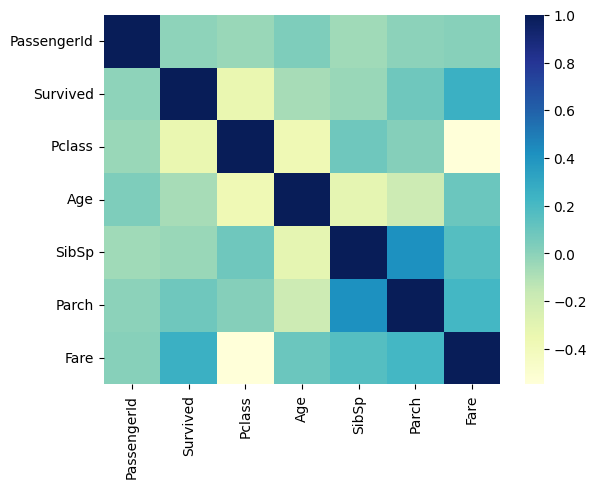

In [ ]:

sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show()

STRATIFIED SHUFFLESPLIT CROSS-VALIDATOR

In [ ]:
#Provides train/test indices to split data in train/test sets

from sklearn.model_selection import StratifiedShuffleSplit
split_data=StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices,test_indices in split_data.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
  strat_train_set=titanic_data.loc[train_indices]
  strat_test_set=titanic_data.loc[test_indices]

strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
114,115,0,3,"Attalah, Miss. Malake",female,17.0,0,0,2627,14.4583,NaN,C
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
411,412,0,3,"Hart, Mr. Henry",male,NaN,0,0,394140,6.8583,NaN,Q
408,409,0,3,"Birkeland, Mr. Hans Martin Monsen",male,21.0,0,0,312992,7.7750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
703,704,0,3,"Gallagher, Mr. Martin",male,25.0,0,0,36864,7.7417,NaN,Q
501,502,0,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S


DATATYPES INFO

In [ ]:
 strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 888 to 487
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          572 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        164 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


EXPLORATORY DATA ANALYSIS

1)VISUALIZING DISTRUBUTION (CATEGORICAL ATTRIBUTES)

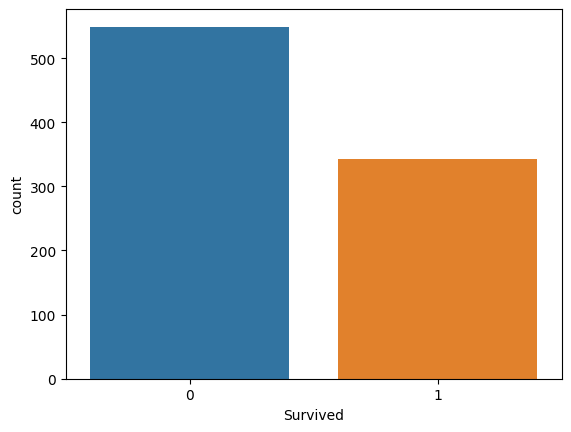

In [ ]:
#sns.countplot(titanic_data['Survived'])
sns.countplot(x="Survived", data=titanic_data)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

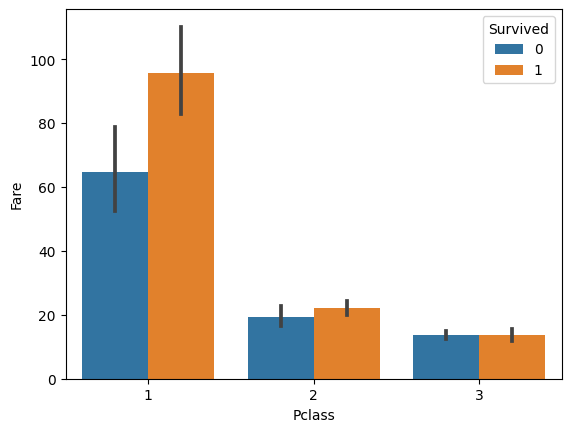

In [ ]:
sns.barplot(x="Pclass", y="Fare", data=titanic_data , hue="Survived")

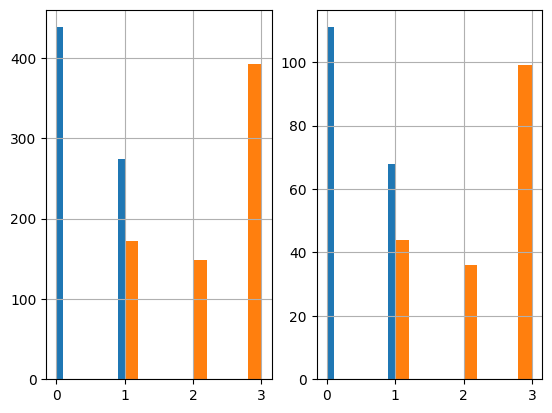

In [ ]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.show()

DATA PREPROCESSING

In [ ]:
#to find missing values
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

CUSTOM TRANSFORMERS


1.   MISSING VALUES IMPUTATION HANDLING METHODS
2.   ENCODING CATEGORICAL FEATURES
3.   DROPPING SPECIFIC COLUMNS








In [ ]:
# print (sklearn.__version__)
#used for data preprocessing, feature engineering, and other transformations in a machine learning pipeline.
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.impute import SimpleImputer
class AgeImputer(BaseEstimator,TransformerMixin):
    def fit(self,X,Y=None):
        return self

    def transform(self,X):
        imputer=SimpleImputer(strategy="mean")
        X['Age']= imputer.fit_transform(X[['Age']])
        return X



ONE-HOT ENCODING

In [ ]:
#used to convert categorical variables into a binary matrix format.
from sklearn.preprocessing import OneHotEncoder
class FeatureEncoder(BaseEstimator,TransformerMixin):
    def fit(self,X,Y=None):
        return self

  # Transform the 'Embarked' and 'Sex' columns using the fitted encoder

    def transform(self,X):
        encoder =OneHotEncoder()
        embarked_matrix= encoder.fit_transform(X[['Embarked']]).toarray()  # Encode the 'Embarked' feature
        column_names=["C","S","Q","N"]

        for i in range(len(embarked_matrix.T)):
            X[column_names[i]]=embarked_matrix.T[i]

# Encode the 'Gender' feature

        gender_matrix=encoder.fit_transform(X[['Sex']]).toarray()
        column_names=["Male","Female"]

        for i in range(len(gender_matrix.T)):
            X[column_names[i]]=gender_matrix.T[i]

        return X




In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, Y=None):
        return self

    def transform(self, X):
        # Use the inplace parameter to drop columns from the DataFrame
        X.drop(['Embarked','Name', 'Ticket', 'Cabin', 'Sex', 'N'], axis=1, inplace=True, errors='ignore')
        return X

PIPELINING

In [ ]:
from sklearn.pipeline import Pipeline
# Create an instance of the FeatureEncoder
feature_encoder = FeatureEncoder()
# Fit the encoder to your training data (strat_train_set)
feature_encoder.fit(strat_train_set)


pipeline = Pipeline([('age_imputer', AgeImputer()),
                    ('featur_eencoder', FeatureEncoder()),
                    ('feature_dropper', FeatureDropper())])

strat_train_set = pipeline.fit_transform(strat_train_set)



In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 888 to 487
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Male         712 non-null    float64
 11  Female       712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


STANDARDIZATION(SCALING)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Extract features and target variable
X = strat_train_set.drop(['Survived'], axis=1)
Y = strat_train_set['Survived']


scaler=StandardScaler()
X_data=scaler.fit_transform(X)
Y_data= Y.to_numpy()



In [ ]:
X_data

array([[ 1.76291498,  0.82789342,  0.        , ...,  0.62717333,
         1.35941164, -1.35941164],
       [ 0.4629228 , -1.56828591,  0.        , ..., -1.59445557,
        -0.73561236,  0.73561236],
       [ 0.67893359,  0.82789342,  0.        , ..., -1.59445557,
         1.35941164, -1.35941164],
       ...,
       [ 0.83995981,  0.82789342,  0.        , ..., -1.59445557,
         1.35941164, -1.35941164],
       [-0.18903702,  0.82789342, -0.70746087, ...,  0.62717333,
        -0.73561236,  0.73561236],
       [ 0.18799999, -1.56828591,  2.13617353, ..., -1.59445557,
        -0.73561236,  0.73561236]])

ENSEMBLING TECHNIQUE


1.   Random Forest Classifier
2.  Grid Search CV (Hyperparameter Tuning)



In [ ]:
#ensemble learning method based on decision trees.
from sklearn.ensemble import RandomForestClassifier

#performs an exhaustive search over a specified hyperparameter grid
from sklearn.model_selection import GridSearchCV

classifier=RandomForestClassifier()

param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10], "min_samples_split":[2,3,4]}
]

grid_search = GridSearchCV(classifier,param_grid,cv=3,scoring="accuracy", return_train_score=True)
grid_search.fit(X_data,Y_data)





GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
#performed the best on the validation data during the hyperparameter optimization process.
final_classifier= grid_search.best_estimator_




In [ ]:
#  #print
final_classifier
#RandomForestClassifier(max_depth=5, n_estimators=500)

RandomForestClassifier(min_samples_split=4, n_estimators=200)

In [ ]:
strat_test_set= pipeline.fit_transform(strat_test_set)
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
114,115,0,3,17.000000,0,0,14.4583,1.0,0.0,0.0,1.0,0.0
649,650,1,3,23.000000,0,0,7.5500,0.0,0.0,1.0,1.0,0.0
351,352,0,1,27.660775,0,0,35.0000,0.0,0.0,1.0,0.0,1.0
411,412,0,3,27.660775,0,0,6.8583,0.0,1.0,0.0,0.0,1.0
408,409,0,3,21.000000,0,0,7.7750,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
632,633,1,1,32.000000,0,0,30.5000,1.0,0.0,0.0,0.0,1.0
703,704,0,3,25.000000,0,0,7.7417,0.0,1.0,0.0,0.0,1.0
501,502,0,3,21.000000,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
457,458,1,1,27.660775,1,0,51.8625,0.0,0.0,1.0,1.0,0.0


In [ ]:

X_test = strat_test_set.drop(['Survived'],axis=1)
Y_test = strat_test_set['Survived']

scaler=StandardScaler()
X_data_test=scaler.fit_transform(X_test)
Y_data_test=Y_test.to_numpy()



CALCULATING ACCURACY SCORE

In [ ]:
final_classifier.score(X_data_test,Y_data_test)

0.8044692737430168

In [ ]:
final_data=pipeline.fit_transform(titanic_data)
 #print
final_data



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Male,Female
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_final=final_data.drop(['Survived'],axis=1)
Y_final=final_data['Survived']

scaler=StandardScaler()
X_data_final=scaler.fit_transform(X_final)
Y_data_final= Y_final.to_numpy()


In [ ]:
prod_classifier=RandomForestClassifier()

param_grid=[
    {"n_estimators":[10,100,200,500],"max_depth":[None,5,10], "min_samples_split":[2,3,4]}
]
grid_search=GridSearchCV(classifier,param_grid,cv=3,scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final,Y_data_final)






GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_classifier= grid_search.best_estimator_
prod_final_classifier

RandomForestClassifier(max_depth=10, min_samples_split=4)

MODEL TESTING

In [ ]:
titanic_test_data=pd.read_csv('test.csv')
final_test_data= pipeline.fit_transform(titanic_test_data)
final_test_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
 9   Male         418 non-null    float64
 10  Female       418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.0 KB


In [ ]:
X_final_test=final_test_data
X_final_test=X_final_test.fillna(method="ffill")

scaler=StandardScaler()

X_data_final_test= scaler.fit_transform(X_final_test)



MODEL PREDICTIONS

In [ ]:
predictions= prod_final_classifier.predict(X_data_final_test)

predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
#dataframe
final_df=pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived']=predictions
final_df.to_csv('Titanic_Survival_Predictions.csv',index=False)

#print
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
